In [142]:
import glob
import pathlib
import pandas as pd
import netCDF4 as nc
from datetime import datetime

In [38]:
# List all files in the current directory as extensions is .nc
files = glob.glob('**/*.nc', recursive=True)
# Apply the pathlib.Path class to the list of files
files = [pathlib.Path(f) for f in files]
# Create a dataframe with the file_path and convert file.name to timestamp
df = pd.DataFrame(files, columns=['file_path'])
df['timestamp'] = df['file_path'].apply(lambda x: datetime.strptime(x.name[:-3], '%Y%m%d_%H%M'))
# Sort the dataframe by timestamp
df = df.sort_values(by='timestamp')

In [184]:
# Calculate
for i,row in df.iterrows():
    nc_file = nc.Dataset(row['file_path'])
    # Calculated std
    std = nc_file.variables['CMI'][:].std()
    # Calculated mean
    mean = nc_file.variables['CMI'][:].mean()
    # Calculated max
    max = nc_file.variables['CMI'][:].max()
    # Calculated min
    min = nc_file.variables['CMI'][:].min()

    # Add to i
    df.loc[i, 'std'] = std
    df.loc[i, 'mean'] = mean
    df.loc[i, 'max'] = max
    df.loc[i, 'min'] = min
    # Close the file
    nc_file.close()

/home/helvecio/miniconda3/envs/pyfortrack/lib/python3.9/site-packages/pandas/core/internals/blocks.py:937: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


In [189]:
# Set timestamp as index
df = df.set_index('timestamp')

In [200]:
# Find gaps in the dataframe
df = df.asfreq('30min')

In [243]:
# Only date between 
df = df.between_time('08:00', '22:00')

In [244]:
# Count NaNs
print('Total de dados Nulos:', df.isnull().count().values[0])
print('Total de dados válidos:', df.dropna().count().values[0])

Total de dados Nulos: 51272
Total de dados válidos: 49989


/tmp/ipykernel_5975/1505414934.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(pd.Grouper(freq='M')).max().plot(figsize=(20,5), title='Max CMI', legend=True, grid=True);
/tmp/ipykernel_5975/1505414934.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby(pd.Grouper(freq='M')).min().plot(figsize=(20,5), title='Min CMI', legend=True, grid=True);


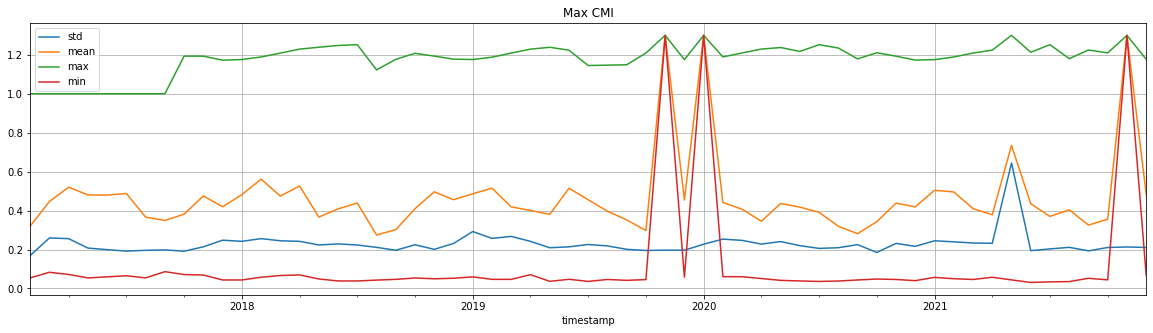

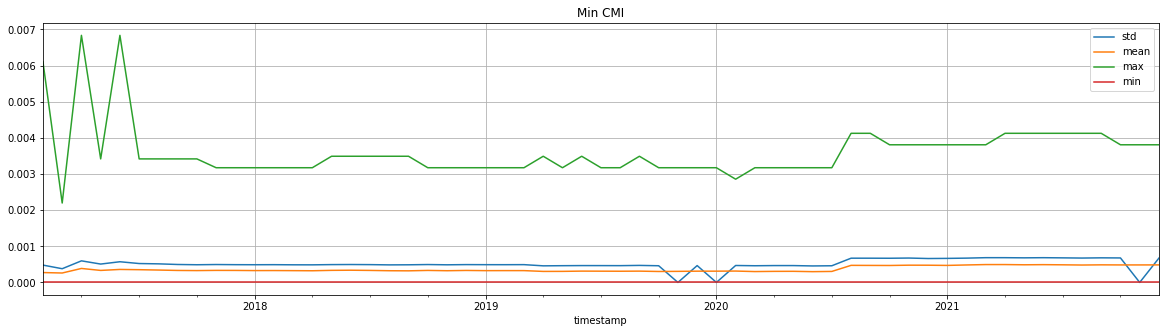

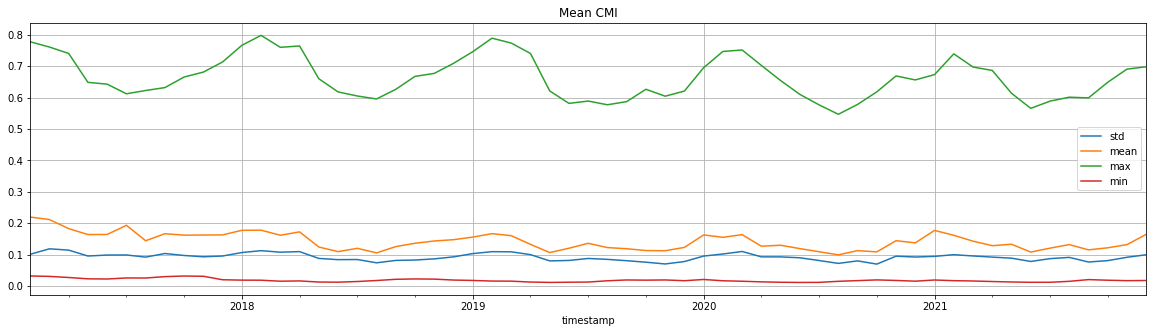

In [245]:
# Group by month and create a df as a result a list of dfs
df.groupby(pd.Grouper(freq='M')).max().plot(figsize=(20,5), title='Max CMI', legend=True, grid=True);
df.groupby(pd.Grouper(freq='M')).min().plot(figsize=(20,5), title='Min CMI', legend=True, grid=True);
df.groupby(pd.Grouper(freq='M')).mean().plot(figsize=(20,5), title='Mean CMI', legend=True, grid=True);

In [246]:
# Save df to csv
df.to_csv('analise.csv')

In [ ]:
# Remove scale_factor and offset
# ncpdq --unpack input_file.nc out_file.nc

In [169]:
# files = glob.glob('**/*.nc', recursive=True)
# for f in sorted(files):
#     os.system("ncatted -a valid_range,CMI,mode,f,"'0,4095'" " + str(f))

In [166]:
# Open using netCDF4 without applying scale_factor and offset
nc_file = nc.Dataset(files[50])

In [167]:
nc_file['CMI']

<class 'netCDF4._netCDF4.Variable'>
int16 CMI(lat, lon)
    long_name: ABI L2+ Cloud and Moisture Imagery reflectance factor
    _FillValue: -1
    grid_mapping: crs
    scale_factor: 0.00031746
    add_offset: 0.0
    units: 1.0
    coordinates: band_id band_wavelength t y x
    valid_range: [   0. 4095.]
unlimited dimensions: 
current shape = (396, 588)
filling on

In [168]:
nc_file['CMI'][:].max()

0.92222136